In [2]:
# import important modules
import numpy as np
import pandas as pd
# sklearn modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB  # classifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    plot_confusion_matrix,
)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# module de prétraitement de texte
from string import punctuation
# text preprocessing modules
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re  # regular expression

# Download dependency
for dependency in (
        "brown",
        "names",
        "wordnet",
        "averaged_perceptron_tagger",
        "universal_tagset",
):
    nltk.download(dependency)

import warnings

warnings.filterwarnings("ignore")
# seeding
np.random.seed(123)

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Administrateur\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package names to
[nltk_data]     C:\Users\Administrateur\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrateur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Administrateur\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\Administrateur\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


In [3]:
import random
random.seed(42) 
import matplotlib.pyplot as plt
import seaborn as sns

# Inline plots in Jupyter notebooks
%matplotlib inline

# better display of review text in dataframes
pd.set_option('display.max_colwidth', 15) 

# Seaborn style
sns.set(style="whitegrid")

In [4]:
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrateur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Administrateur\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrateur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
# je vais commencer par importer les données fournies et étudier à l’oeil le dataset pour observer des premiers grands phénomènes

In [7]:
# load data # charger des données
data = pd.read_csv("allocine_inception_avis9.csv")

In [8]:
# show top five rows of data # afficher les cinq premières lignes de données
data.head()

,Note,Description,key
0,"5,0",Après le ch...,0
1,"5,0",C’est fou c...,1
2,"5,0",CHEF D’ŒUVR...,2
3,"5,0",Un film aus...,3
4,"5,0",Christopher...,4


In [9]:
# check the shape of the data # vérifier la forme des données
data.shape

(7214, 3)

In [10]:
# check missing values in data
# Vérification des valeurs manquantes
data.isnull().sum()

Note           0
Description    1
key            0
dtype: int64

In [11]:
# check for the datatypes amd other info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Note         7214 non-null   object
 1   Description  7213 non-null   object
 2   key          7214 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 169.2+ KB


In [12]:
data.dropna(inplace=True)

In [13]:
data.shape

(7213, 3)

In [14]:
# evalute news sentiment distribution
# évaluer la distribution du sentiment d'actualité
data.Note.value_counts()

5,0    3513
4,5    1214
4,0     808
0,5     344
3,0     310
3,5     294
2,0     259
2,5     193
1,0     186
1,5      92
Name: Note, dtype: int64

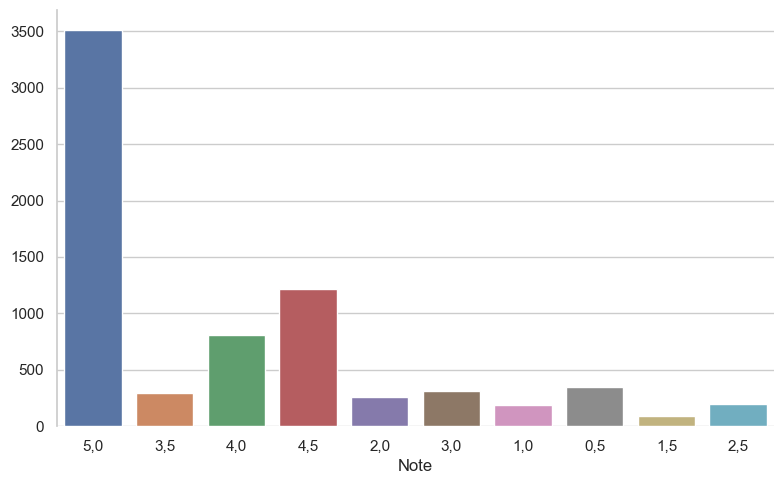

In [15]:
#Rating counts
plt.figure(figsize=(8,5))

ax = sns.countplot(data=data, x='Note')
ax.set(xlabel='Note', ylabel='')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('note_counts.png', dpi=200)

In [16]:
#La tâche d’analyse des sentiments est généralement modélisée comme un problème de classification dans lequel un classificateur 
#est alimenté avec un texte et renvoie la catégorie correspondante, par ex. positif, négatif ou neutre (en cas d’analyse de polarité).

In [17]:
def setClassBin(i):
    if (float(i.replace(',', '.')) >= 4.5):
        return 1
    elif (float(i.replace(',', '.')) <= 2.0):
        return -1
    else:
        return 0

data['Note'] = [setClassBin(x) for x in data.Note]


In [18]:
# evalute news sentiment distribution
# évaluer la distribution du sentiment d'actualité
data.Note.value_counts()

 1    4727
 0    1605
-1     881
Name: Note, dtype: int64

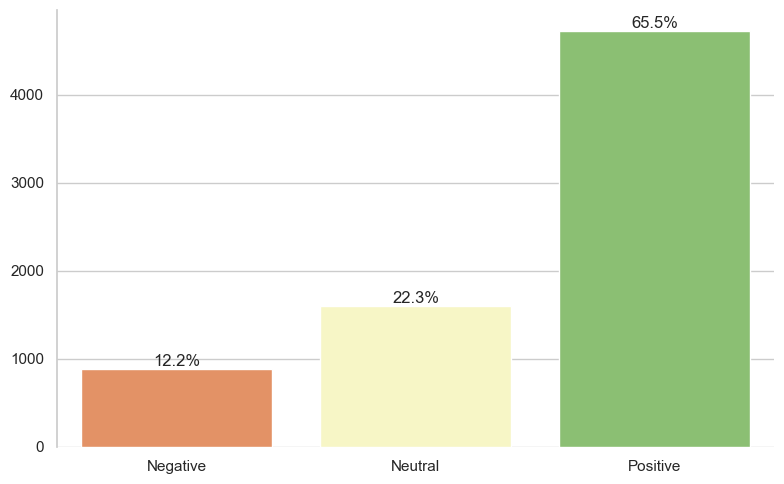

In [19]:
plt.figure(figsize=(8,5))

goodbad_palette = sns.color_palette("RdYlGn_r", n_colors=3)
goodbad_palette.reverse()

ax = sns.countplot(data=data, x='Note', palette=goodbad_palette)
ax.set(xlabel='', ylabel='')
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])

# Frenquencies
ncount = len(data)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('polarity_frequency.png', dpi=200)

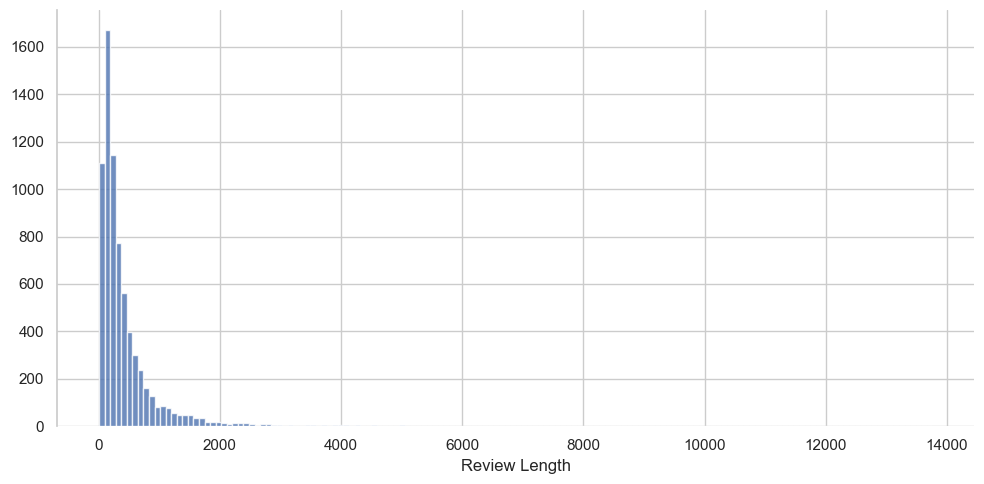

In [20]:
#Reviews length
reviews_length = data['Description'].str.len()

plt.figure(figsize=(10,5))
ax = sns.distplot(reviews_length, bins=150, kde=False, hist_kws=dict(alpha=0.8))
ax.set(xlabel='Review Length')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('reviews_length.png', dpi=200)

In [21]:
THRESHOLD = 2000
short_reviews = data[data['Description'].str.len() <= THRESHOLD]
long_reviews =  data[data['Description'].str.len() > THRESHOLD]

print("{} reviews with LEN > {} ({:.2f} % of total data)".format(
    len(long_reviews),
    THRESHOLD,
    100 * len(long_reviews) / len(data)
))

169 reviews with LEN > 2000 (2.34 % of total data)


In [22]:
long_reviews.head(1)

,Note,Description,key
1,1,C’est fou c...,1


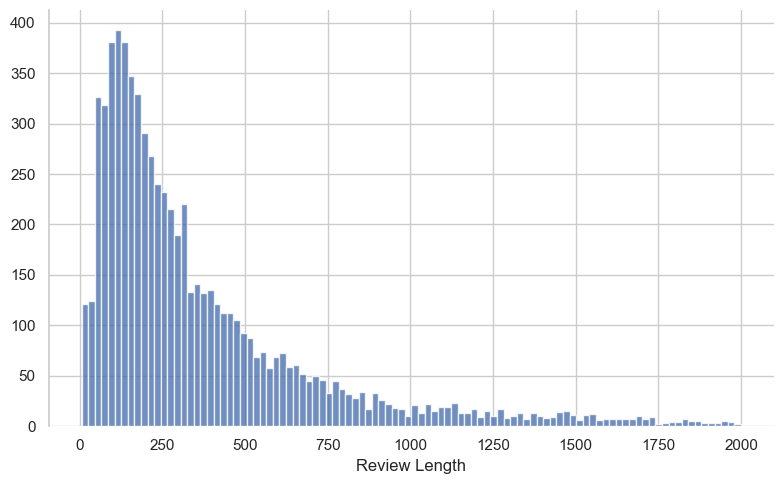

In [23]:
short_reviews_length = short_reviews['Description'].str.len()

plt.figure(figsize=(8,5))
ax = sns.distplot(short_reviews_length, bins=100, kde=False, hist_kws=dict(alpha=0.8))
ax.set(xlabel='Review Length')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('short_reviews_length.png', dpi=200)

In [24]:
data.head(5)

,Note,Description,key
0,1,Après le ch...,0
1,1,C’est fou c...,1
2,1,CHEF D’ŒUVR...,2
3,1,Un film aus...,3
4,1,Christopher...,4


In [25]:
#Build dataset
dataset_df = data.copy()
initial_len = len(dataset_df)
print("Length: {}".format(initial_len))

Length: 7213


In [26]:
def loss_percentage(df, previous_length):
    new_length = len(df)
    percentage = 100*(1-(new_length/previous_length))    
    return new_length, percentage  

In [27]:
# Drop rows we don't need (neutral polarity)
# Supprimez les rangées dont nous n'avons pas besoin (polarité neutre)
dataset_df = dataset_df[dataset_df['Note'] != 0]
length, percentage = loss_percentage(dataset_df, initial_len)
print("Length: {} (-{:.1f} %)".format(length, percentage))

Length: 5608 (-22.3 %)


In [28]:
# Change -1 to 0 for negative polarity
# Changer -1 à 0 pour la polarité négative
dataset_df.loc[dataset_df['Note'] == -1, 'Note'] = 0

In [29]:
dataset_df.groupby('Note').size()

Note
0     881
1    4727
dtype: int64

In [30]:
# Remove reviews with less than 3 characters # Supprimer les avis de moins de 3 caractères
# Done after text processing on purpose
dataset_df = dataset_df[dataset_df['Description'].str.len() > 2]

In [31]:
#Clean review text # Nettoyer le texte de l'avis
import re

def clean_text(text):
    text = text.replace('\xa0', ' ')
    text = text.replace('\x92', "'")
    
    # Substituting multiple spaces with single space
    # Also remove '\n' and '\r' occurences
    text= re.sub(r'\s+', ' ', text, flags=re.I)
    
    return text
 
dataset_df['Description'] = dataset_df['Description'].apply(clean_text)

In [32]:
# better display of review text in dataframes    # meilleur affichage du texte de révision dans les dataframes
pd.set_option('display.max_colwidth', None) 

In [33]:
dataset_df.sample(5, random_state=42)

,Note,Description,key
2891,1,"Waouh, après l'excellent the Dark Knight Cristopher Nolan nous sert enfin le plat chaud, en effet à coté d'Inception son Batman fait figure d'apéro.Inception nous plonge complétement dans un univers où le mélange du réel et de l'irréel est terrifiant et prend une place plus qu'un importante dans la vie de chacun, pour arriver à ce résultat Nolan a créer un nouveau concept du rêve étrange et bourré de virtuosité. Mis à part l'idée principale du film: celle qui l'a fait naître, Inception brille aussi par la complexité de ses personnages à l'image du veuf plein de remords qui ne sait plus comment dissocier l'irréelle du réel depuis la perte de sa femme qui dans son subconscient est plus démoniaque qu'aimable, pour retrouver une vie simple auprès de ses enfants notre héros acceptera une ultime Inception.Tout ça porté par un magnifique casting avec Léonardo Dicaprio toujours brillant, Marion Cottillard complétement terrifiante, Ellen Page qui est assurément la meilleur actrice de sa génération, et aussi à un degrés moindre Cillian Murphy et Joseph-Gordon- Lewitt. Inception à coup sur deviendra un classique à se demander si ce n'était pas qu'un beau rêve.",11
2545,0,"Beaucoup trop compliqué pour être interresant .J'ai passe mon temps a regarder l'heure , c'est trop long trop inutile on cherche l'intérêt",10
440,0,"Mais c'est quoi cette merde ? Bavardages incessants, son exécrable, musique pseudo-angoissante pendant deux heures : mais oui les Américains sont aussi capables de faire des bouses infâmes avec des gros budgets.",5
3000,1,"juste enorme! scenar/musique,et le doute à la fin du film qui fait reflechir,j'irai le revoir pour verifier certains trucs mais franchement super",0
1897,1,"Christopher Nolan a t-il réussi le film parfait ? Émouvoir, faire réfléchir, inquiéter, fasciner, Inception a tout accompli. Un Scenario magique, des acteurs qui incarnent leurs personnages comme nul autres acteurs n'aurait sans doute pu le faire. Dernier chose à dire : Une merveille Cinématographique !",7


In [34]:
min_num = min(dataset_df.groupby('Note').size())
min_num

881

In [35]:
#clean the review
# nettoyer la critique des films
#Lemmatizer - function Il enracine le mot mais veille à ce qu'il ne perde pas son sens.
# Stopwords - Les mots vides sont les mots couramment utilisés et sont supprimés du texte car ils n'ajoutent aucune valeur à l'analyse.

In [36]:
# La fonction text_cleaning() gérera toutes les étapes nécessaires pour nettoyer notre jeu de données.
#The text_cleaning() function will handle all necessary steps to clean our dataset.

stop_words =  stopwords.words('french')
def text_cleaning(text, remove_stop_words=True, lemmatize_words=True):
    # Clean the text, with the option to remove stop_words and to lemmatize word
    # Clean the text
    text = re.sub(r"[^A-Za-z0-9]", " ", text)
    text = re.sub(r"\'s", " ", text)
    text =  re.sub(r'http\S+',' link ', text)
    text = re.sub(r'\b\d+(?:\.\d+)?\s+', '', text) # remove numbers
        
    # Remove punctuation from text
    text = ''.join([c for c in text if c not in punctuation])
    
    # Optionally, remove stop words
    if remove_stop_words:
        text = text.split()
        text = [w for w in text if not w in stop_words]
        text = " ".join(text)
    
    # Optionally, shorten words to their stems
    if lemmatize_words:
        text = text.split()
        lemmatizer = WordNetLemmatizer() 
        lemmatized_words = [lemmatizer.lemmatize(word) for word in text]
        text = " ".join(lemmatized_words)
    
    # Return a list of words
    return(text)

In [37]:
data = dataset_df.copy()

In [38]:


data["cleaned_review"] = data["Description"].apply(text_cleaning)

In [39]:
data.head()

Note  \
0     1   
1     1   
2     1   
3     1   
4     1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [40]:
#séparer les fonctionnalités et la cible des données
#split features and target from  data 

X = data["cleaned_review"]
y = data.Note.values

In [41]:
# diviser les données en train et valider
# split data into train and validate

X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    test_size=0.15,
    random_state=42,
    shuffle=True,
    stratify=y,
)

In [62]:
def train_cnn(train_x, train_y, batch_size = 50, epochs = 10, verbose =2):
    
    n_words = train_x.shape[1]
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(filters=100, kernel_size=5, activation='relu', input_shape=(n_words,1)),
        tf.keras.layers.MaxPool1D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense( units=1, activation='sigmoid')
    ])
    
    model.compile( loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    model.fit(train_x, train_y, batch_size, epochs, verbose)
    return model


In [42]:
#les données finales acquises sont converties sous forme numérique à l'aide de TF-IDF. 
# TfidfVectorizer Il s'agit d'un algorithme très courant pour transformer le texte en une représentation significative des nombres 
#qui est utilisée pour ajuster l'algorithme de la machine pour la prédiction.
#les données sont volumineuses, je opte pour les classificateurs de réseau de neurones LogisticRegression
# Create a classifier in pipeline
sentiment_classifier = Pipeline(steps=[
                               ('pre_processing',TfidfVectorizer(lowercase=False)),
                                 ('clf',LogisticRegression())])

In [43]:
# train the sentiment classifier

sentiment_classifier.fit(X_train,y_train)

Pipeline(steps=[('pre_processing', TfidfVectorizer(lowercase=False)),
                ('clf', LogisticRegression())])

In [60]:
#sentiment_classifier = Pipeline(steps=[
 #                              ('pre_processing',TfidfVectorizer(lowercase=False)),
  #                               ('clf',train_cnn(train_x, train_y))])

In [102]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense, SpatialDropout1D
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from tensorflow.keras.layers import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from numpy import array
from numpy import asarray
from numpy import zeros
from tensorflow.keras.layers import LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [111]:
sentiment_label = data.Note.factorize()
sentiment_label 


(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 Int64Index([1, 0], dtype='int64'))

In [77]:
tokenizer = Tokenizer(num_words=5000)
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

In [81]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [82]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [83]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          100       
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 1)                 10001     
                                                                 
Total params: 10,101
Trainable params: 10,001
Non-trainable params: 100
_________________________________________________________________
None


In [47]:
# tester les performances du modèle sur des données valides
# test model performance on valid data 

y_preds = sentiment_classifier.predict(X_valid)

In [48]:
# score de précision
accuracy_score(y_valid,y_preds)

0.8966745843230404

In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_valid,y_preds)

array([[ 51,  81],
       [  6, 704]], dtype=int64)

In [100]:
tweet = data["cleaned_review"]

In [103]:
tokenizer = Tokenizer(num_words=5000) 
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1 
encoded_docs = tokenizer.texts_to_sequences(tweet) # chaque tweet encodé
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [104]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 200, 32)           464736    
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 200, 32)          0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 481,387
Trainable params: 481,387
Non-trainable params: 0
________________________________________________

In [112]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
141/141 [==============================] - 17s 100ms/step - loss: 0.4480 - accuracy: 0.8270 - val_loss: 0.2278 - val_accuracy: 0.8930
Epoch 2/10
141/141 [==============================] - 14s 102ms/step - loss: 0.2177 - accuracy: 0.9171 - val_loss: 0.1581 - val_accuracy: 0.9394
Epoch 3/10
141/141 [==============================] - 16s 111ms/step - loss: 0.1325 - accuracy: 0.9545 - val_loss: 0.1551 - val_accuracy: 0.9421
Epoch 4/10
141/141 [==============================] - 15s 107ms/step - loss: 0.0785 - accuracy: 0.9757 - val_loss: 0.1594 - val_accuracy: 0.9492
Epoch 5/10
141/141 [==============================] - 15s 108ms/step - loss: 0.0583 - accuracy: 0.9808 - val_loss: 0.1624 - val_accuracy: 0.9421
Epoch 6/10
141/141 [==============================] - 15s 108ms/step - loss: 0.0533 - accuracy: 0.9851 - val_loss: 0.1733 - val_accuracy: 0.9456
Epoch 7/10
141/141 [==============================] - 15s 108ms/step - loss: 0.0423 - accuracy: 0.9880 - val_loss: 0.1812 - val_ac

In [65]:
#Graphes accuracy et pertes pour les données d'entrainement et de validation (test)

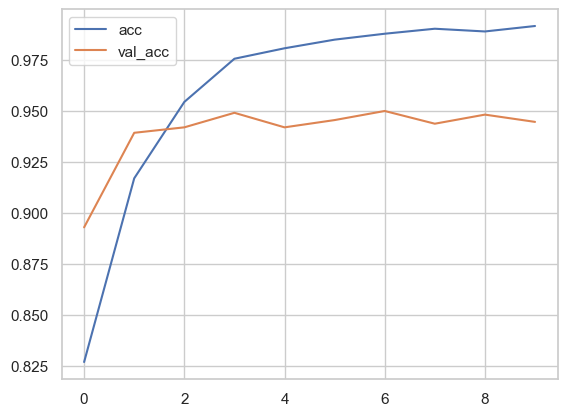

<Figure size 640x480 with 0 Axes>

In [113]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

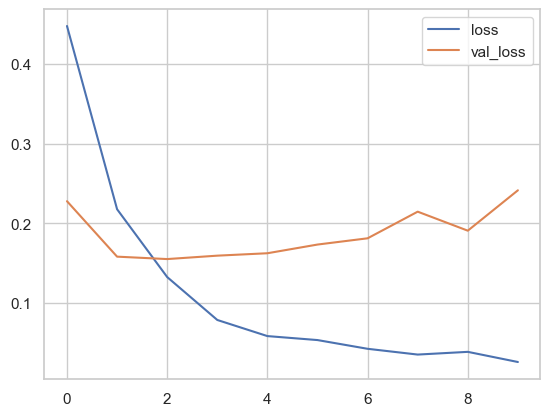

<Figure size 640x480 with 0 Axes>

In [114]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

In [47]:
#save model # Enregistrez le modèle dans le fichier pickle 
import joblib 
joblib.dump(sentiment_classifier, 'sentimentsfrench_model_pipeline.pkl')

['sentimentsfrench_model_pipeline.pkl']

In [ ]:
#Le principe est simple, en étudiant des millions de textes labellisés avec un certain sentiment, 
#le système est capable d’associer un champ lexical précis pour chaque sentiment. 
#En lui donnant un nouveau texte, il sera alors capable de prédire avec une bonne précision, 
#l’état émotionnel de l’auteur au moment de l’écriture de ce texte.
# testons si cet algorithme fonctionne bien